In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
from itertools import combinations
from statsmodels.stats.multitest import multipletests


In [26]:
file_path = r"C:\Users\34679\Desktop\TFM\DatosSemantica\comparacion_categorias.xlsx"

df = pd.read_excel(file_path, sheet_name='Sheet1')

df.head(12)


,Participante,Banda de Frecuencia,Categoría Semántica,F1 Score,Accuracy
0,Participante 1,Alpha,Food,0.91,1.00
1,Participante 1,Alpha,Kitchen,0.81,0.86
2,Participante 1,Alpha,Animals,0.78,0.70
3,Participante 1,Alpha,Music,0.72,0.69
4,Participante 1,Alpha,Body_Parts,0.95,1.00
5,Participante 1,Alpha,Clothes,0.86,0.75
6,Participante 1,Beta,Food,0.83,0.93
7,Participante 1,Beta,Kitchen,0.72,0.60
8,Participante 1,Beta,Animals,0.57,0.60
9,Participante 1,Beta,Music,0.64,0.61


In [33]:
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests


df_grouped_F1 = df.groupby(['Participante', 'Banda de Frecuencia'])['F1 Score'].mean().reset_index()

print(df_grouped_F1.head())

bands = ['Alpha', 'Beta', 'Gamma', 'High Gamma']

wilcoxon_results = {}

for i in range(len(bands)):
    for j in range(i + 1, len(bands)):
        band1 = bands[i]
        band2 = bands[j]
        
        # Filtrar los datos por banda de frecuencia
        data1 = df_grouped_F1[df_grouped_F1['Banda de Frecuencia'] == band1]['F1 Score']
        data2 = df_grouped_F1[df_grouped_F1['Banda de Frecuencia'] == band2]['F1 Score']
        
        
        min_length = min(len(data1), len(data2))
        data1 = data1.iloc[:min_length]
        data2 = data2.iloc[:min_length]
        
        
        stat, p_value = stats.wilcoxon(data1, data2)
        wilcoxon_results[f"{band1} vs {band2}"] = (stat, p_value)

results_df = pd.DataFrame(wilcoxon_results, index=['Estadístico', 'Valor p']).T

p_values = results_df['Valor p'].astype(float)

_, p_adjusted, _, _ = multipletests(p_values, method='bonferroni')

results_df['Valor p Ajustado'] = p_adjusted

print(results_df)


     Participante Banda de Frecuencia  F1 Score
0  Participante 1           All Bands  0.306667
1  Participante 1               Alpha  0.838333
2  Participante 1                Beta  0.725000
3  Participante 1               Gamma  0.578333
4  Participante 1          High Gamma  0.216667
                     Estadístico   Valor p  Valor p Ajustado
Alpha vs Beta               28.0  0.243896          1.000000
Alpha vs Gamma              17.0  0.047852          0.287109
Alpha vs High Gamma          0.0  0.000244          0.001465
Beta vs Gamma               16.0  0.039795          0.238770
Beta vs High Gamma           1.0  0.000488          0.002930
Gamma vs High Gamma          1.0  0.000488          0.002930


C:\Users\34679\AppData\Local\Temp\ipykernel_25264\41296578.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Banda de Frecuencia', y='F1 Score', data=df_grouped_F1, palette='Set2', fliersize=0, linewidth=1.2)


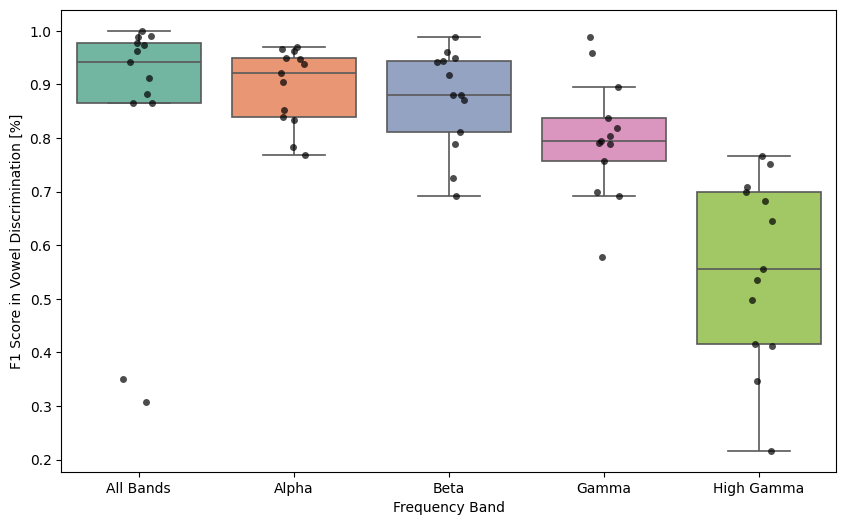

In [34]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='Banda de Frecuencia', y='F1 Score', data=df_grouped_F1, palette='Set2', fliersize=0, linewidth=1.2)

sns.stripplot(x='Banda de Frecuencia', y='F1 Score', data=df_grouped_F1, jitter=True, color='black', size=5, dodge=False, alpha=0.7)

plt.title(None)
plt.xlabel('Frequency Band')
plt.ylabel('F1 Score in Vowel Discrimination [%]')

plt.savefig('boxplot_f1_score.png', format='png', bbox_inches='tight')

plt.show()



In [32]:
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests


df_grouped_A = df.groupby(['Participante', 'Banda de Frecuencia'])['Accuracy'].mean().reset_index()

print(df_grouped_A.head())

bands = ['Alpha', 'Beta', 'Gamma', 'High Gamma']

wilcoxon_results = {}

for i in range(len(bands)):
    for j in range(i + 1, len(bands)):
        band1 = bands[i]
        band2 = bands[j]
        
        # Filtrar los datos por banda de frecuencia
        data1 = df_grouped_A[df_grouped_A['Banda de Frecuencia'] == band1]['Accuracy']
        data2 = df_grouped_A[df_grouped_A['Banda de Frecuencia'] == band2]['Accuracy']
        
        
        min_length = min(len(data1), len(data2))
        data1 = data1.iloc[:min_length]
        data2 = data2.iloc[:min_length]
        
        
        stat, p_value = stats.wilcoxon(data1, data2)
        wilcoxon_results[f"{band1} vs {band2}"] = (stat, p_value)

results_df = pd.DataFrame(wilcoxon_results, index=['Estadístico', 'Valor p']).T

p_values = results_df['Valor p'].astype(float)

_, p_adjusted, _, _ = multipletests(p_values, method='bonferroni')

results_df['Valor p Ajustado'] = p_adjusted

print(results_df)


     Participante Banda de Frecuencia  Accuracy
0  Participante 1           All Bands  0.330000
1  Participante 1               Alpha  0.833333
2  Participante 1                Beta  0.728333
3  Participante 1               Gamma  0.553333
4  Participante 1          High Gamma  0.258333
                     Estadístico   Valor p  Valor p Ajustado
Alpha vs Beta               30.0  0.305420          1.000000
Alpha vs Gamma              17.0  0.047852          0.287109
Alpha vs High Gamma          0.0  0.000244          0.001465
Beta vs Gamma               18.0  0.057373          0.344238
Beta vs High Gamma           1.0  0.000488          0.002930
Gamma vs High Gamma          1.0  0.000488          0.002930


C:\Users\34679\AppData\Local\Temp\ipykernel_25264\2823394355.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Banda de Frecuencia', y='F1 Score', data=df_grouped_F1_filtered, palette='Set2', fliersize=0, linewidth=1.2)


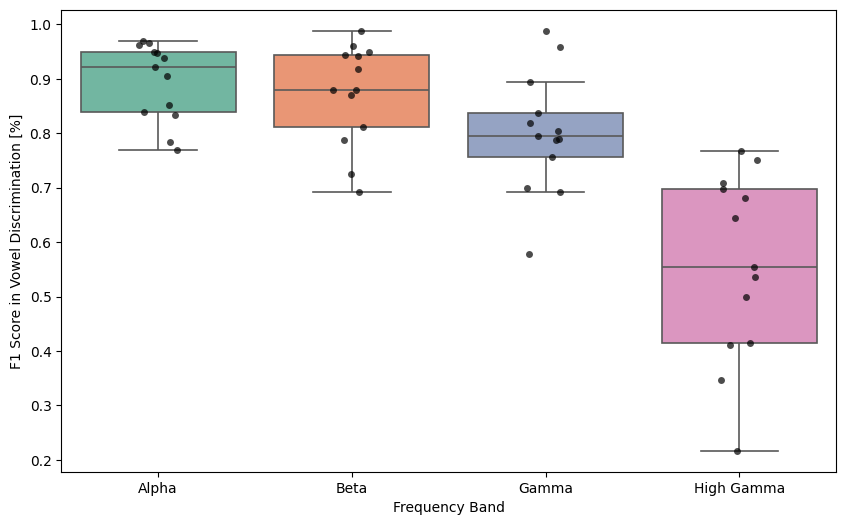

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

bands_to_include = ['Alpha', 'Beta', 'Gamma', 'High Gamma']
df_grouped_F1_filtered = df_grouped_F1[df_grouped_F1['Banda de Frecuencia'].isin(bands_to_include)]

plt.figure(figsize=(10, 6))

sns.boxplot(x='Banda de Frecuencia', y='F1 Score', data=df_grouped_F1_filtered, palette='Set2', fliersize=0, linewidth=1.2)

sns.stripplot(x='Banda de Frecuencia', y='F1 Score', data=df_grouped_F1_filtered, jitter=True, color='black', size=5, dodge=False, alpha=0.7)

plt.title(None)
plt.xlabel('Frequency Band')
plt.ylabel('F1 Score in Vowel Discrimination [%]')

plt.savefig('boxplot_f1_score.png', format='png', bbox_inches='tight')

# Mostrar el gráfico
plt.show()


Sigma Test Results:
Alpha:
  Mean Accuracy = 0.8940
  Standard Deviation = 0.0707
  Z-Score = 35.41
  p-Value = 0.0000

Beta:
  Mean Accuracy = 0.8769
  Standard Deviation = 0.0916
  Z-Score = 26.64
  p-Value = 0.0000

Gamma:
  Mean Accuracy = 0.8017
  Standard Deviation = 0.1148
  Z-Score = 18.89
  p-Value = 0.0000

High Gamma:
  Mean Accuracy = 0.5638
  Standard Deviation = 0.1668
  Z-Score = 7.87
  p-Value = 0.0000



C:\Users\34679\AppData\Local\Temp\ipykernel_25264\2478217873.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=combined_df, x='Banda de Frecuencia', y='Accuracy', palette='Pastel1')


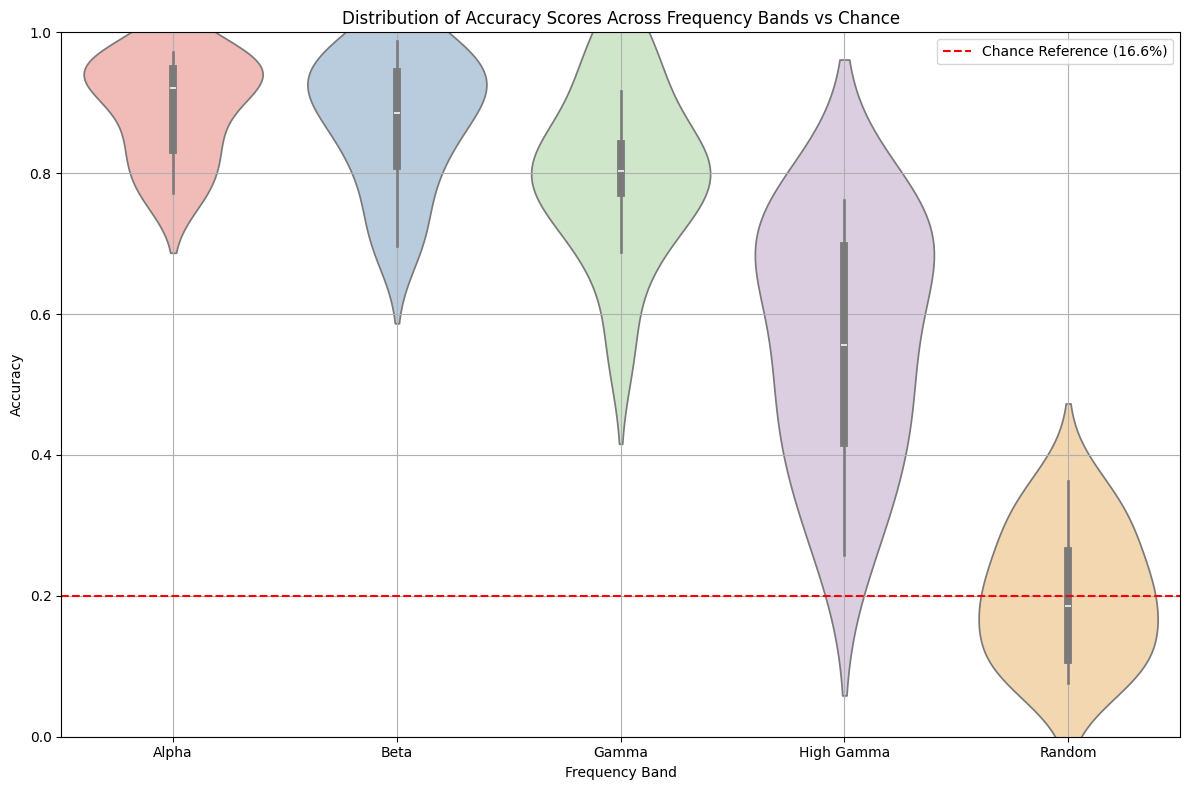

In [38]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

reference_value = 0.20

data = {
    'Participante': np.tile(range(1, 10), 4),
    'Banda de Frecuencia': ['Alpha']*9 + ['Beta']*9 + ['Gamma']*9 + ['High Gamma']*9,
    'Accuracy': np.random.uniform(0.5, 0.9, 36)
}
df = df = pd.read_excel(file_path, sheet_name='Sheet1')
df_grouped = df.groupby(['Participante', 'Banda de Frecuencia'])['Accuracy'].mean().reset_index()

filtered_df = df_grouped[df_grouped['Banda de Frecuencia'] != 'All Bands']

random_data = pd.DataFrame({
    'Participante': filtered_df['Participante'].unique(),  # Mantener la misma cantidad de participantes
    'Banda de Frecuencia': ['Random'] * len(filtered_df['Participante'].unique()),
    'Accuracy': np.clip(np.random.normal(loc=reference_value, scale=0.1, size=len(filtered_df['Participante'].unique())), 0, 1)
})

combined_df = pd.concat([filtered_df, random_data])

results = []

for band in filtered_df['Banda de Frecuencia'].unique():
    band_data = filtered_df[filtered_df['Banda de Frecuencia'] == band]['Accuracy']
    mean_accuracy = band_data.mean()
    std_accuracy = band_data.std()
    z_score = (mean_accuracy - reference_value) / (std_accuracy / np.sqrt(len(band_data)))
    p_value = stats.norm.sf(np.abs(z_score)) * 2  # Valor p para el Z-Score
    results.append((band, mean_accuracy, std_accuracy, z_score, p_value))

print("Sigma Test Results:")
for band, mean_accuracy, std_accuracy, z_score, p_value in results:
    print(f"{band}:")
    print(f"  Mean Accuracy = {mean_accuracy:.4f}")
    print(f"  Standard Deviation = {std_accuracy:.4f}")
    print(f"  Z-Score = {z_score:.2f}")
    print(f"  p-Value = {p_value:.4f}\n")

plt.figure(figsize=(12, 8))
sns.violinplot(data=combined_df, x='Banda de Frecuencia', y='Accuracy', palette='Pastel1')

plt.axhline(reference_value, color='red', linestyle='--', label=f'Chance Reference (16.6%)')

plt.ylim(0, 1)  # Limitar el eje y entre 0 y 1

plt.title('Distribution of Accuracy Scores Across Frequency Bands vs Chance')
plt.xlabel('Frequency Band')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('Model_vs_Chance_Comparison_Frequency_Bands_Accuracy.png', format='png', bbox_inches='tight')
plt.show()


<>:22: SyntaxWarning: invalid escape sequence '\d'
<>:22: SyntaxWarning: invalid escape sequence '\d'
C:\Users\34679\AppData\Local\Temp\ipykernel_25264\729461440.py:22: SyntaxWarning: invalid escape sequence '\d'
  filtered_df['Participante Number'] = filtered_df['Participante'].str.extract('(\d+)').astype(int)


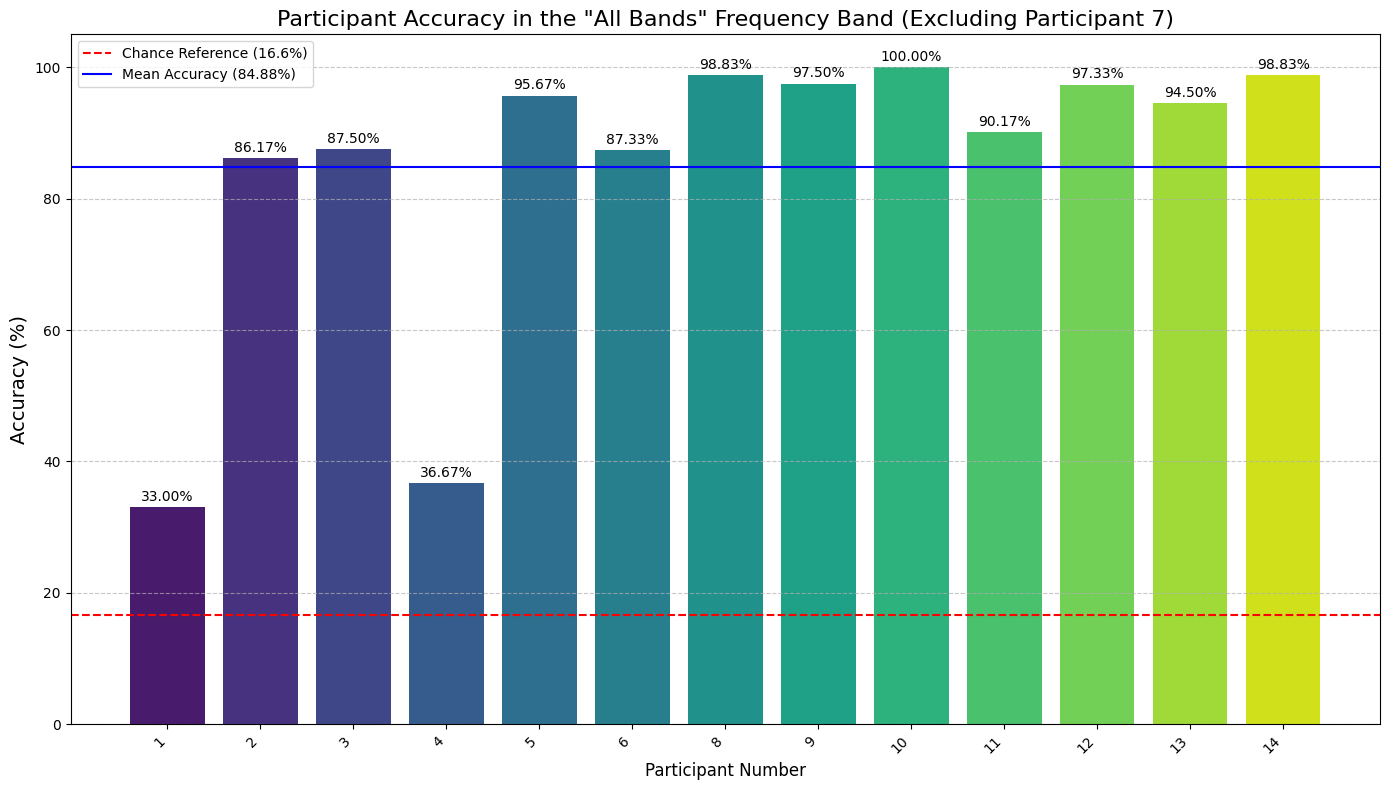

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

reference_value = 0.166

df_grouped = df.groupby(['Participante', 'Banda de Frecuencia'])['Accuracy'].mean().reset_index()

filtered_df = df_grouped[df_grouped['Banda de Frecuencia'] == 'All Bands']

filtered_df = filtered_df[filtered_df['Participante'] != 'Participante 7']

filtered_df['Accuracy (%)'] = filtered_df['Accuracy'] * 100

filtered_df['Participante Number'] = filtered_df['Participante'].str.extract('(\d+)').astype(int)

mean_accuracy = filtered_df['Accuracy (%)'].mean()

filtered_df = filtered_df.sort_values(by='Participante Number')

plt.figure(figsize=(14, 8))

colors = sns.color_palette("viridis", len(filtered_df))

bars = plt.bar(filtered_df['Participante Number'].astype(str), filtered_df['Accuracy (%)'], color=colors)

plt.axhline(reference_value * 100, color='red', linestyle='--', label='Chance Reference (16.6%)')

plt.axhline(mean_accuracy, color='blue', linestyle='-', label=f'Mean Accuracy ({mean_accuracy:.2f}%)')

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        height + 0.5,  # 
        f'{height:.2f}%',  
        ha='center', 
        va='bottom', 
        fontsize=10, 
        color='black'  
    )

plt.title('Participant Accuracy in the "All Bands" Frequency Band (Excluding Participant 7)', fontsize=16)
plt.xlabel('Participant Number', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=14)

plt.xticks(rotation=45, ha='right')

plt.legend()

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
 